In [9]:
# Import linear algebra and dataframe libraries
import numpy as np
import pandas as pd

#data visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#import clustering library
from sklearn.cluster import k_means
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [10]:
# Import the dataset 
df = pd.read_csv('Wholesale customers data.csv')

#view its header and footer
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [12]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


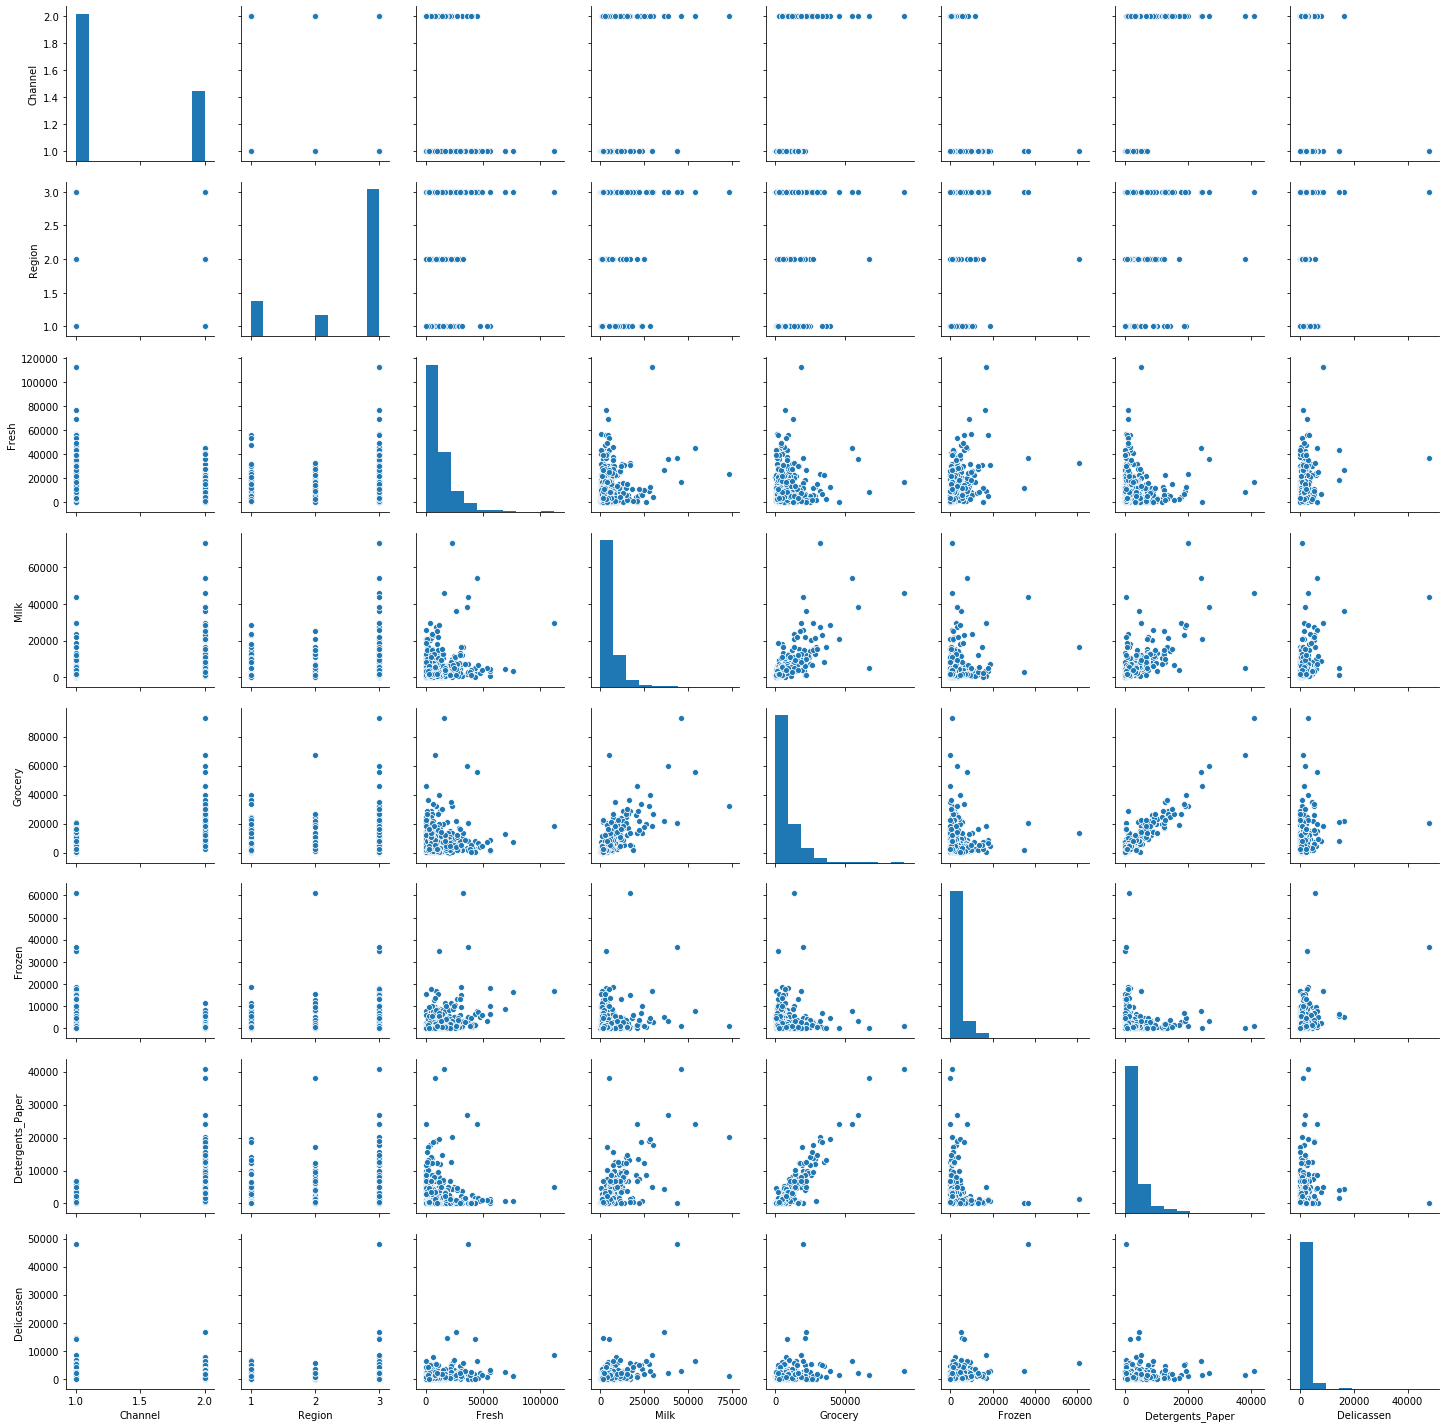

In [13]:
#find scatter plot between all numerical features
sns.pairplot(df)

In [14]:
df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


### We will drop 'region' from our feature set X since it has low correlation to overall data
### Remove column 'channel' from dataframe since it is not same as other features 

In [15]:
# Remove column name 'Region' 
df.drop(['Region','Channel'], axis = 1) 

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [16]:
# Assign all variables other than customer as independent variables
X = df.iloc[:,:].values

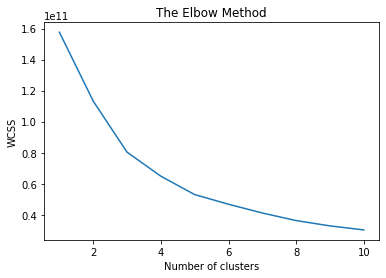

In [17]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
X

array([[    2,     3, 12669, ...,   214,  2674,  1338],
       [    2,     3,  7057, ...,  1762,  3293,  1776],
       [    2,     3,  6353, ...,  2405,  3516,  7844],
       ...,
       [    2,     3, 14531, ...,   437, 14841,  1867],
       [    1,     3, 10290, ...,  1038,   168,  2125],
       [    1,     3,  2787, ...,    65,   477,    52]], dtype=int64)

Text(0.5, 1.0, 'K-means')

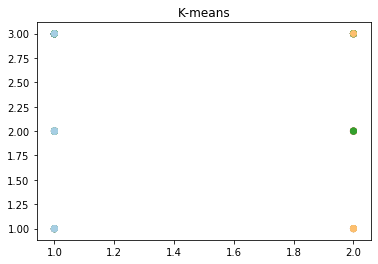

In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("K-means")

In [20]:
# make sure data is properly excluding nominal features for consistency
# Remove column name 'Region' and 'Channel' 
df.drop(['Region','Channel'], axis = 1, inplace = True) 

In [21]:
# Assign all variables other than customer as independent variables
X = df.iloc[:,:].values

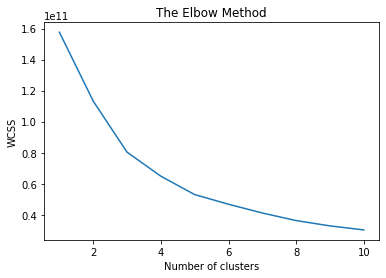

In [23]:
#apply the elbow method to determine number of clusters to use
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Text(0.5, 1.0, 'K-means')

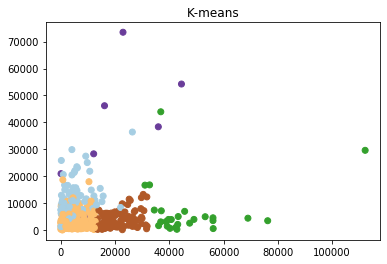

In [22]:
#fit data to kmeans cluster model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("K-means")

Text(0.5, 1.0, 'Hierarchical')

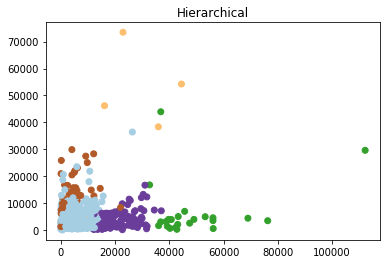

In [23]:
#fit data to agglomerative clustering aka hierarchical cluster model
hier = AgglomerativeClustering(n_clusters=5)
y_pred2 = hier.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred2, cmap='Paired')
plt.title("Hierarchical")

Text(0.5, 1.0, 'DBSCAN')

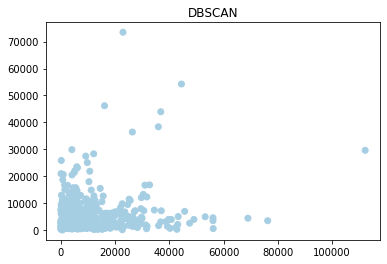

In [24]:
# #fit data DB cluster model, note this is not that effective in this case
db = DBSCAN(eps=5, min_samples=5)
db.fit(X)
y_pred3 = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred3, cmap='Paired')
plt.title("DBSCAN")

### Now we try clustering using 3 clusters as showed in elbow graph it is another major turn point and might give more consistent results

Text(0.5, 1.0, 'K-means')

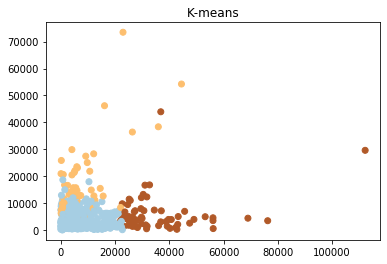

In [25]:
#fit data to kmeans cluster model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("K-means")

Text(0.5, 1.0, 'Hierarchical')

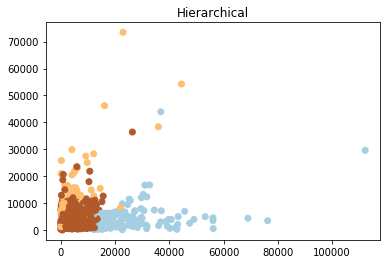

In [26]:
#fit data to agglomerative clustering aka hierarchical cluster model
hier = AgglomerativeClustering(n_clusters=3)
y_pred2 = hier.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred2, cmap='Paired')
plt.title("Hierarchical")

# So three clusters looks like a better fit :)

Text(0.5, 1.0, 'K-means')

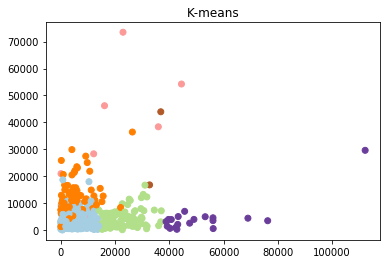

In [27]:
#let us try with 6 clusters since it is where the elbow graph reaches constant decrease
#fit data to kmeans cluster model
from sklearn.cluster import KMeans
km = KMeans(n_clusters=6)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("K-means")

### still three seems like the best fit